In [151]:
!pip install keras
!pip install tensorflow==2.2

In [152]:
# Importing the main packages for data analysis
import pandas as pd
import datetime
import numpy as np

In [153]:
# Read CSV database of Chilean Bank multiple Indexes and Precipitation Statistics
df_ppt = pd.read_csv("precipitaciones.csv")
df_bcn = pd.read_csv("banco_central.csv", thousands='.')

# Duplicates drop in both dataframes
df_bcn.drop_duplicates(keep = "first", inplace = True)
df_ppt.drop_duplicates(keep = "first", inplace = True)

# Keeping just Year-Month-Day in the date column
df_bcn['Periodo'] = df_bcn['Periodo'].astype(str).str[:10]

# Eliminate a very wrong row that has a month that does not even exist 
df_bcn = df_bcn[df_bcn["Periodo"]!="2020-13-01"]

# Create a Datetime column, which will be used as index, Sorting Dataframes by dates
df_bcn["Periodo"] = pd.to_datetime(df_bcn["Periodo"], format="%Y-%m-%d")
df_bcn = df_bcn.sort_values(by="Periodo")

df_ppt["date"] = pd.to_datetime(df_ppt["date"], format="%Y-%m-%d")
df_ppt = df_ppt.sort_values(by="date")

# Data curation and dropping NaN rows in the Precipitation Dataframe
df_bcn = df_bcn.replace("a", np.nan)
df_ppt.dropna(axis=0, how='any', inplace=True)

In [154]:
# Converting string numbers to numeric format. The original format was xxx.xxx.xxx for millions.
def replace(value):
    if type(value) == str:
        return value.replace('.', '')
    else:
        return value
        
df_bcn = df_bcn.applymap(replace)

In [155]:
# Numeric convertion of string values in Dataframe
periodo = df_bcn["Periodo"].tolist()
df_bcn = df_bcn.drop(columns=["Periodo"]).apply(pd.to_numeric, errors='ignore')

# There are some anomalies in the different index columns of the Central Bank Dataframe
# Median Filter is applied to every columns with a 3 element window, to smooth the presence
# of noise in the different time series. Median filter is more stable than Mean filter
df_bcn = df_bcn.rolling(window=3).apply(np.median)

In [156]:
df_bcn.describe()

,Imacec_empalmado,Imacec_produccion_de_bienes,Imacec_minero,Imacec_industria,Imacec_resto_de_bienes,Imacec_comercio,Imacec_servicios,Imacec_a_costo_de_factores,Imacec_no_minero,PIB_Agropecuario_silvicola,...,Indice_de_tipo_de_cambio_real___TCR_promedio_1986_100,Indice_de_produccion_industrial,Indice_de_produccion_industrial__mineria,Indice_de_produccion_industrial_electricidad__gas_y_agua,Indice_de_produccion_industrial__manufacturera,Generacion_de_energia_electrica_CDEC_GWh,Indice_de_ventas_comercio_real_IVCM,Indice_de_ventas_comercio_real_no_durables_IVCM,Indice_de_ventas_comercio_real_durables_IVCM,Ventas_autos_nuevos
count,2.960000e+02,2.960000e+02,2.960000e+02,2.960000e+02,2.960000e+02,2.960000e+02,2.960000e+02,2.960000e+02,2.960000e+02,9.100000e+01,...,4.160000e+02,1.400000e+02,3.680000e+02,8.000000e+01,3.560000e+02,2.600000e+02,8.000000e+01,8.000000e+01,8.000000e+01,141.000000
mean,5.398256e+08,6.559150e+08,6.855010e+08,6.504554e+08,5.667392e+08,4.703494e+08,4.689618e+08,5.201449e+08,5.031018e+08,3.235209e+08,...,6.536428e+08,6.202585e+08,6.604453e+08,1.689475e+08,6.104903e+08,4.230056e+08,3.025236e+08,3.114646e+08,3.558315e+08,26403.624113
std,2.986636e+08,3.080185e+08,3.495445e+08,3.139641e+08,2.925174e+08,2.719342e+08,2.855553e+08,3.041770e+08,2.952015e+08,1.551017e+08,...,3.756653e+08,4.056129e+08,2.882233e+08,2.329324e+08,3.120143e+08,1.767189e+08,3.528527e+08,3.638750e+08,3.679441e+08,6719.216209
min,6.474646e+07,8.696327e+07,9.588208e+07,1.071085e+07,1.028194e+07,3.914745e+07,1.058812e+07,1.065150e+07,4.774487e+07,5.505933e+07,...,7.662271e+07,1.009822e+08,1.097628e+07,1.100801e+07,6.354050e+07,6.310000e+03,1.009939e+08,1.055055e+07,1.039010e+07,6703.000000
25%,1.139813e+08,6.513731e+08,1.130605e+08,6.377448e+08,4.641848e+08,2.849367e+08,1.141303e+08,1.106823e+08,1.142172e+08,1.921549e+08,...,1.102096e+08,1.041898e+08,3.871916e+08,1.033536e+08,5.189141e+08,3.480761e+08,1.039158e+08,1.033080e+08,1.168002e+08,23636.000000
50%,5.843265e+08,7.697695e+08,8.762564e+08,7.553421e+08,6.386332e+08,4.360802e+08,4.954918e+08,5.889480e+08,5.364705e+08,2.848215e+08,...,8.845239e+08,9.022522e+08,7.790195e+08,1.058928e+08,6.900402e+08,4.622889e+08,1.094342e+08,1.060189e+08,1.322355e+08,27308.000000
75%,7.867147e+08,8.782820e+08,9.303687e+08,8.807220e+08,8.093101e+08,6.629747e+08,7.101759e+08,7.793996e+08,7.572947e+08,3.847607e+08,...,9.332443e+08,9.518755e+08,9.034062e+08,1.087373e+08,8.772306e+08,5.583363e+08,1.236101e+08,2.957986e+08,8.493913e+08,31474.000000
max,9.930899e+08,9.939599e+08,9.966763e+08,9.948849e+08,9.599783e+08,9.855646e+08,9.593122e+08,9.900045e+08,9.889148e+08,6.338361e+08,...,9.906842e+08,9.907011e+08,9.901984e+08,9.920492e+08,9.914427e+08,6.545170e+08,9.988923e+08,9.901438e+08,9.717798e+08,38729.000000


In [157]:
df_ppt.describe()

,Coquimbo,Valparaiso,Metropolitana_de_Santiago,Libertador_Gral__Bernardo_O_Higgins,Maule,Biobio,La_Araucania,Los_Rios
count,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000
mean,16.154691,32.450980,49.666682,72.249805,98.662773,128.113406,151.486456,199.451789
std,32.629286,55.434330,74.361099,101.426112,122.766771,130.056094,126.628503,140.073615
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.001170,0.005331,0.748127
25%,0.821521,1.538162,5.297546,5.343992,11.897363,29.356684,52.930343,89.805643
50%,4.071036,9.037825,19.087592,25.995969,45.649888,79.558557,110.570990,159.467940
75%,16.137600,38.409213,63.408364,101.875093,142.230716,184.751307,208.316243,274.594590
max,347.133889,441.048604,524.592667,645.515752,759.177712,702.434707,661.211203,717.735673


In [158]:
# We have realize that time period of both dataframes is different, there are many gaps in the time series of Central Bank Dataframe
# Besides, before the Median Filter application, there were plenty inconsistencies in the columns. Probably, some typing mistake because
# does not make sense that between one year and another, indexes drop an order of magnitude.

In [159]:
df_bcn["Periodo"] = periodo

In [160]:
import matplotlib.pyplot as plt

# Precipitation plot display, Inputs: region, start_date and end_date in the format YY-mm-dd
def visualizacion_ppt(region, start_date, end_date):
    columns = df_ppt.columns[1:]
    min_date, max_date = df_ppt["date"].min(), df_ppt["date"].max()
    s_date, e_date = pd.Timestamp(start_date), pd.Timestamp(end_date)
    if (min_date <= s_date)&(max_date >= e_date):
        indices = (df_ppt["date"] >= start_date) & (df_ppt["date"] <= end_date)
        df = df_ppt.loc[indices]
        if region in columns:
            df = df[["date", region]]
            df.set_index('date').plot()
        else:
            print("Region no existe. La lista de opciones disponibles son : ", ", ".join(columns))
    else:
        print("Las fechas elegidas deben estar entre: ", min_date, "y", max_date)

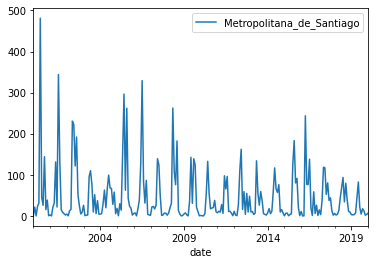

In [161]:
visualizacion_ppt("Metropolitana_de_Santiago", "2000-01-01",  "2020-01-01")

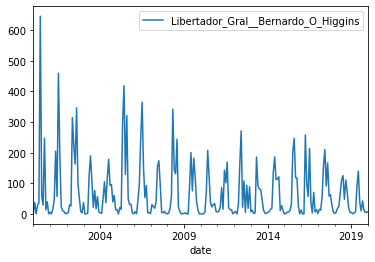

In [162]:
visualizacion_ppt("Libertador_Gral__Bernardo_O_Higgins", "2000-01-01",  "2020-01-01")

In [163]:
# There is a decresing tendency in the timeseries and also it is seasonality with a peak in the Winter season. The decreasing tendency
# might be explained due to the impact of climate change in the central region of Chile

In [164]:

# Multiple seasons precipitation plot display. Input variables are region and a list with the years you want to display.
def visualizacion_multi_ppt(region, years):
    columns = df_ppt.columns[1:]
    
    if region in columns:
        df = df_ppt[["date", region]]
        df["year"] = df["date"].dt.year
        df["month"] = df["date"].dt.month
        df = df[df["year"].isin(years)]
        df = df.set_index('month')
        df.groupby('year')[region].plot(legend='True')
        plt.show()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


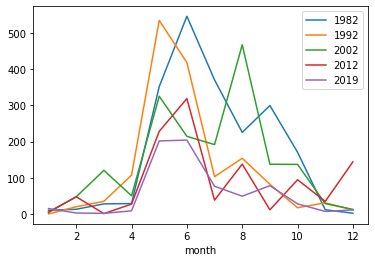

In [165]:
visualizacion_multi_ppt("Maule", [1982, 1992, 2002, 2012, 2019])
# There is a decreasing tendency in the monthly accumulated precipitation from 1982-2019. Climate change is affecting the weather
# and precipitation over the past decades

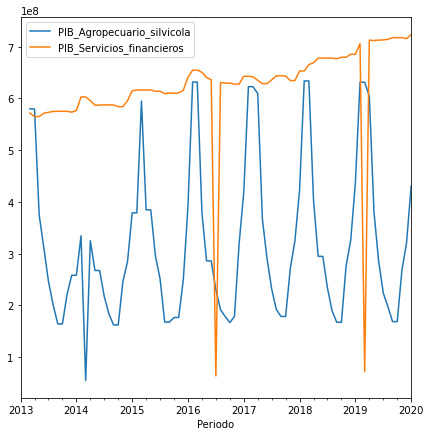

In [166]:

# PIB activities comparison plot display between two dates. Input variables are the PIB activities, start date and end date.
def visualizacion_pib(pib_1, pib_2, start_date, end_date):
    columns = df_bcn.columns[1:]
    min_date, max_date = df_bcn["Periodo"].min(), df_bcn["Periodo"].max()
    s_date, e_date = pd.Timestamp(start_date), pd.Timestamp(end_date)
    if (min_date <= s_date)&(max_date >= e_date):
        indices = (df_bcn["Periodo"] >= start_date) & (df_bcn["Periodo"] <= end_date)
        df = df_bcn.loc[indices]
        if (pib_1 in columns)&(pib_1 in columns):
            df = df[["Periodo", pib_1, pib_2]]
            df = df.set_index('Periodo')
            df[[pib_1, pib_2]].plot(figsize=(7,7))
        else:
            print("Actividad no existe. La lista de opciones disponibles son : ", ", ".join(columns))
    else:
        print("Las fechas elegidas deben estar entre: ", min_date, "y", max_date)

# The timeseries were previously smoothed for a better visualization and also reducing the noisy values
# Agriculure- forestry activites increases during Spring-Summer seasons. It is the harvest season, while the rest
# of the year is the growing season and there is less activity. On the other hand, Financial Services activites stay quite
# stable during the most part of the year

visualizacion_pib('PIB_Agropecuario_silvicola', 'PIB_Servicios_financieros', "2013-01-01", "2020-01-01")



In [167]:
# Reading the Milk Price CSV file and converting month to numbers
df_mlk = pd.read_csv("precio_leche.csv")
mes_dict = {'Ene': 1, 'Feb':2, 'Mar':3, 'Abr':4, 'May':5, 'Jun':6, 'Jul':7, 'Ago':8, 'Sep':9, 'Oct':10, 'Nov':11, 'Dic':12}
df_mlk['Mes'] = df_mlk['Mes'].replace(mes_dict)

In [168]:
# Create a Datatime column and setting it as the index
df_mlk['Fecha'] = df_mlk['Anio'].astype(str).str.zfill(4) + "-" + df_mlk['Mes'].astype(str).str.zfill(2) + "-01"
df_mlk['Fecha'] = pd.to_datetime(df_mlk['Fecha'], format="%Y-%m-%d")
df_mlk = df_mlk.set_index('Fecha')

<AxesSubplot:xlabel='Fecha'>

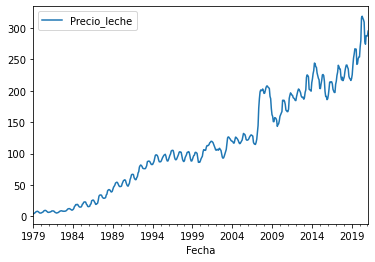

In [169]:
# Plotting the milk price time serie
mlk_serie = df_mlk
mlk_serie.drop(columns=["Mes", "Anio"]).plot()
# The timeserie has seasonality and an increasing tendency. As everything in this country.

In [170]:
# Our first approach to the problem is going to use only the data that is fully complete in the dataframes. Central bank most important index
# started in 2013, such as Electricity generation, Agriculture PIB among others. So we are aiming to have less time period but with 
# more variables
df_mlk = df_mlk[df_mlk["Anio"]>=2013]

In [171]:
# We also filter Central Bank and Precipitation Dataframe, starting in 2013
indices = (df_ppt["date"] >= "2013-01-01")
df_ppt = df_ppt.loc[indices]

indices = (df_bcn["Periodo"] >= "2013-01-01")
df_bcn = df_bcn.loc[indices]

In [172]:
df_ppt["year"] = df_ppt["date"].dt.year
df_ppt["month"] = df_ppt["date"].dt.month

In [173]:
df_bcn["Anio"] = df_bcn['Periodo'].dt.year
df_bcn["Mes"] = df_bcn['Periodo'].dt.month

In [174]:
# Merge Precipitation and Milk DFs first by two keys YY-MM
df_total = pd.merge(df_ppt, df_mlk,  how='left', left_on=['year','month'], right_on = ['Anio','Mes'])

In [175]:
df_total = df_total.sort_values(by="date")

In [176]:
# Drop duplicated columns, because we already have "year", "month"
df_total.drop(columns=["Anio", "Mes"], inplace=True)

In [177]:
# Merge the Milk-Precipitation DF with the Centrl Bank DF, again repeting the same keys
df_total = pd.merge(df_total, df_bcn,  how='left', left_on=['year','month'], right_on = ['Anio','Mes'])

In [178]:
# Set Datetime column as Index of the Merged Dataframe and drop the repeated columns
df_total = df_total.set_index('date')
df_total.drop(columns=["Anio", "Mes"], inplace=True)

In [179]:
# We select some columns that might be correlated to the Milk Price
# Some sort of Expert Knowledge filtering

df_total = df_total[['Coquimbo',
 'Valparaiso',
 'Metropolitana_de_Santiago',
 'Libertador_Gral__Bernardo_O_Higgins',
 'Maule',
 'Biobio',
 'La_Araucania',
 'Los_Rios',
 'Precio_leche',
 'PIB_Agropecuario_silvicola',
 'PIB_Alimentos',
 'PIB_Electricidad',
 'PIB_Transporte',
 'PIB_Servicios_financieros',
 'Impuesto_al_valor_agregado',
 'PIB',
 'Precio_de_la_gasolina_en_EEUU_dolaresm3',
 'Precio_del_gas_natural_dolaresmillon_de_unidades_termicas_britanicas',
 'Precio_del_petroleo_Brent_dolaresbarril',
 'Precio_del_kerosene_dolaresm3',
 'Precio_del_petroleo_WTI_dolaresbarril',
 'Precio_del_propano_centavos_de_dolargalon_DTN',
 'Tipo_de_cambio_del_dolar_observado_diario',
 'Ocupacion_en_Agricultura_INE',
 'Indice_de_produccion_industrial',
 'Indice_de_produccion_industrial_electricidad__gas_y_agua',
 'Indice_de_produccion_industrial__manufacturera',
 'Generacion_de_energia_electrica_CDEC_GWh']]

In [180]:
# Move predicted column to the first position in the Dataframe
df_total = df_total[ ['Precio_leche'] + [ col for col in df_total.columns if col != 'Precio_leche' ] ]

In [181]:
# To estimate correlation between Timeseries, we implement Crosscorrelation.
# There might be lags in the correlationg between some columns and the milk price
# That is the reason why common correlation is not useful for timeseries. It won't
# deliver any insight if Timeseries do not share the same time aligment

def crosscorr(datax, datay, lag=0):
    return datax.corr(datay.shift(lag))

# Compute crosscorrelation between the selected columns and set a max lag window of 6 periods to compute
d_price = df_total['Precio_leche']
columns = df_total.columns.tolist()[1:]
window = 6
lags = np.arange(0, (window), 1)  # contrained

dictionary = {}

# Save the maximum absolute cross correlation value, and the number of lags in a dictionary
for col in columns:
    d_aux = df_total[col]
    rs = np.nan_to_num([crosscorr(d_price, d_aux, lag) for lag in lags])
    dictionary[col] = [np.max(np.abs(rs)), np.argmax(np.abs(rs))]

In [182]:
# Print the dictionary and we can discover which variables are truly correlated to the Milk Price and whick are not
# Remember that correlation can be possitive or negative, but the module is the strenght of the correlation
# Besides, there is an average of 5 lags for the max correlation between precipitation and milk price
# It is important because rain accumulation is correlated to milk production and influences the price
# Also, Electricity generation and Gasoline price also affect the cost of the milk
dictionary

{'Coquimbo': [0.36445092493258363, 5],
 'Valparaiso': [0.4247666563782808, 5],
 'Metropolitana_de_Santiago': [0.4419962847482987, 5],
 'Libertador_Gral__Bernardo_O_Higgins': [0.4451576888386912, 4],
 'Maule': [0.42594134511167714, 4],
 'Biobio': [0.3737425377187853, 4],
 'La_Araucania': [0.3643301059308907, 4],
 'Los_Rios': [0.3443700175088447, 4],
 'PIB_Agropecuario_silvicola': [0.42246611066706535, 2],
 'PIB_Alimentos': [0.2588702738511037, 1],
 'PIB_Electricidad': [0.15781058360601505, 5],
 'PIB_Transporte': [0.31411485165533787, 2],
 'PIB_Servicios_financieros': [0.30672552684036136, 0],
 'Impuesto_al_valor_agregado': [0.5989037712084899, 5],
 'PIB': [0.2438484558537414, 3],
 'Precio_de_la_gasolina_en_EEUU_dolaresm3': [0.07389025660742075, 3],
 'Precio_del_gas_natural_dolaresmillon_de_unidades_termicas_britanicas': [0.14518972092888688,
  0],
 'Precio_del_petroleo_Brent_dolaresbarril': [0.2532604299102011, 0],
 'Precio_del_kerosene_dolaresm3': [0.05501512475177263, 4],
 'Precio_del

In [183]:
df_total.fillna(0, inplace=True)

(65, 1, 139) (65,) (18, 1, 139) (18,)
Epoch 1/100
17/17 [==============================] - 0s 21ms/step - loss: 0.1235 - val_loss: 0.4087
Epoch 2/100
17/17 [==============================] - 0s 4ms/step - loss: 0.1366 - val_loss: 0.7740
Epoch 3/100
17/17 [==============================] - 0s 4ms/step - loss: 0.1075 - val_loss: 0.4069
Epoch 4/100
17/17 [==============================] - 0s 28ms/step - loss: 0.0323 - val_loss: 0.5468
Epoch 5/100
17/17 [==============================] - 0s 4ms/step - loss: 0.0344 - val_loss: 0.5009
Epoch 6/100
17/17 [==============================] - 0s 4ms/step - loss: 0.0276 - val_loss: 0.5060
Epoch 7/100
17/17 [==============================] - 0s 4ms/step - loss: 0.0251 - val_loss: 0.5164
Epoch 8/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0223 - val_loss: 0.5131
Epoch 9/100
17/17 [==============================] - 0s 4ms/step - loss: 0.0196 - val_loss: 0.5127
Epoch 10/100
17/17 [==============================] - 0s 4ms/step - l

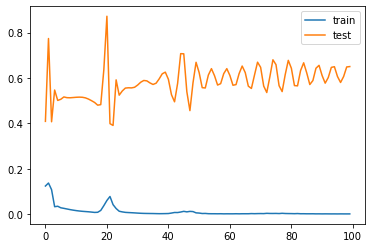

In [184]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

#First approach to the forecast price problem is a LSTM Neural Network.
# We set the delay expectation in 5, according to the max crosscorrelation between variables
# Besides, it is not neccesary to add new variables to the dataset, such as precipitation accumulation
# Deep Learning approach will generate those variables if the optimization process aims to generate it
# Good features will be build by the Network in the intermediate layers

# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg
 
# load dataset
values = df_total.values
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 5, 0)
 
# split into train and test sets
values = reframed.values
n_train_hours = 65
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)
 
# design network
model = Sequential()
model.add(LSTM(100, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')
# fit network
history = model.fit(train_X, train_y, epochs=100, batch_size=4, validation_data=(test_X, test_y), shuffle=False)
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [185]:
# Training stage shows that the LSTM model is overfitting, there is a decrease in the loss of the training dataset, while the test loss
# just runs stable during a 100 epochs. The trainig/testing set was splited 80/20, but the main problem is that between 2013-2020, there are
# barely 84 samples to train. This is not enought to build a Deep Learning approach to the problem

In [189]:
# Our second approach will be to use a state of the art model for Time Series forecast called Prophet, created by facebook
# Prophet has been built to internalize seasonality and tendency in time series, which is perfect for our dataset.
# The first approach would be to build a Month seasonality model, trained with just the whole Milk Price Timeserie starting in 1970.
# No exogenous variables added, just the Milk Price time serie

mlk_serie.drop(columns=["Anio", "Mes"], inplace=True)

from fbprophet import Prophet
from fbprophet.plot import plot_plotly

df = pd.DataFrame()
df["y"] = mlk_serie
df["ds"] = mlk_serie.index


model = Prophet(seasonality_mode='multiplicative').fit(df)

#model = Prophet(weekly_seasonality=False)
#model.add_seasonality(name='monthly', period=365, fourier_order=5)
#model.fit(df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
from fbprophet.diagnostics import cross_validation
# To measure the performance of the model we have decided to pic 217 samples between 2011-2021. They are more recent samples, which would
# would reflect more accuracy. 
df_cv = cross_validation(model, initial = pd.to_timedelta(12000,unit="D"), horizon = pd.to_timedelta(30,unit="D"))

INFO:fbprophet:Making 217 forecasts with cutoffs between 2011-11-21 00:00:00 and 2021-01-02 00:00:00


  0%|          | 0/217 [00:00<?, ?it/s]

In [ ]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head(30)

In [ ]:
# Forecast is a regression problem, different from classification. That is why accuracy and precision are not valid performance metrics here.
# In this case; MSE, RMSE, MAE are the best performance metrics to measure the differente between real milk price and forecasted price.

In [ ]:
# We decided to run a second test with Prophet Model
# This time, we decided to add some exogenous variables added. The most correlated variables are
# added like regressors to the model
# Lets remember that this Dataframe starts in 2013, due to the Central Bank measurement of indicators such as Electricity}
# Generation and also PIB. There are less samples to fit the model

df = pd.DataFrame()
df["y"] = df_total["Precio_leche"]
df["ds"] = df_total.index
df["Maule"] = df_total["Maule"]
df["Biobio"] = df_total["Biobio"]
df["La_Araucania"] = df_total["La_Araucania"]
df["Los_Rios"] = df_total["Los_Rios"]
df["Generacion_de_energia_electrica_CDEC_GWh"] = df_total["Generacion_de_energia_electrica_CDEC_GWh"]
df["PIB_Agropecuario_silvicola"] = df_total["PIB_Agropecuario_silvicola"]
df["Precio_del_petroleo_Brent_dolaresbarril"] = df_total["Precio_del_petroleo_Brent_dolaresbarril"]

model = Prophet(seasonality_mode='multiplicative')
model.add_regressor('Maule')
model.add_regressor('Biobio')
model.add_regressor('La_Araucania')
model.add_regressor('Los_Rios')
model.add_regressor('Generacion_de_energia_electrica_CDEC_GWh')
model.add_regressor('PIB_Agropecuario_silvicola')
model.add_regressor('Precio_del_petroleo_Brent_dolaresbarril')

model = model.fit(df)

In [ ]:
# This time, we have created a cross validation dataset starting in 2013. We pich a sample every 3 months, so there are 4 samples in a year
# And we have to forecast to the next month horizon
df_cv = cross_validation(model, initial='30 days', period='90 days', horizon = '30 days')
#cutoffs = pd.date_range(start='2000-01-01', end='2020-01-01', freq='5MS')
#df_cv = cross_validation(model=model, horizon='30 days', cutoffs=cutoffs)

In [ ]:
df_p = performance_metrics(df_cv)
df_p.head(30)

In [ ]:
# The prophet model is a continuous model, even if it has been trained on monthly date, is capable of delivering
# daily forecast. This time performance metrics are not as stable than the previous experiment. Seems that
# it is more valuable for the model to have a larger time window, rather than adding more explanatory variables.
# In conclusion, the best model for the milk price forecast is the Prophet in the single timeserie without exogenous variables
# Probably, if we had a larger time window with Central Bank indicators, it could be possible to achieve a better forecaster.
# We still need to deploy a final experiment, combining the timeserie, with just precipitation data as regressors. It might improve the model

In [ ]:
# The milk price forecast could be useful to simulate the impact of climate change and global warming in the price of food worlwide. It is
# important to measure the potential impact of the climate change in carrying a food crisis in several regions around the world.